In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
dataset=pd.read_csv('kc_house_data.csv')

In [3]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
def correlation_heatmap(data):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(dataset.corr(),annot=True,cmap=colormap)

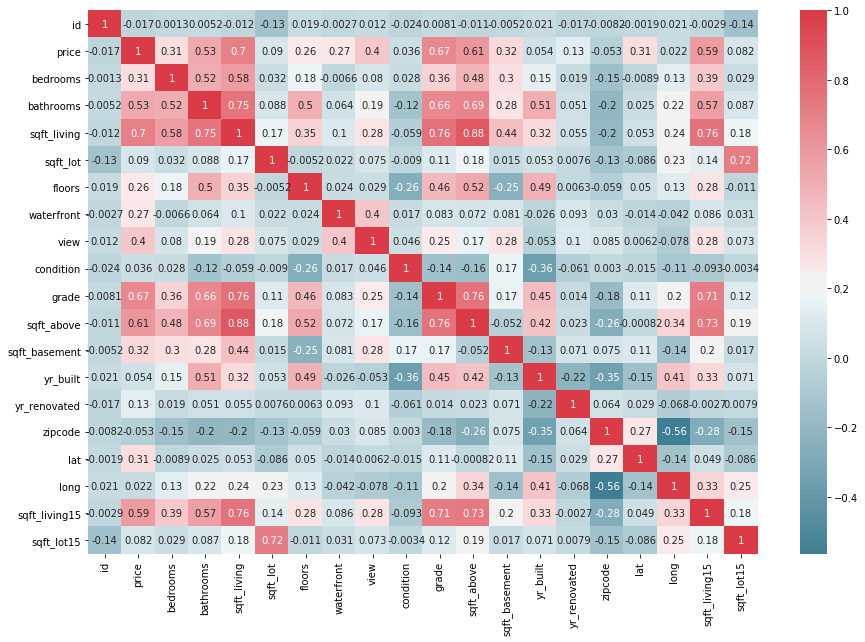

In [16]:
correlation_heatmap(dataset)

In [27]:
#drop unwanted columns
# axis 1=columns
# axis 2=rows
dataset=dataset.drop(['id','date','zipcode','lat','long'],axis=1)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


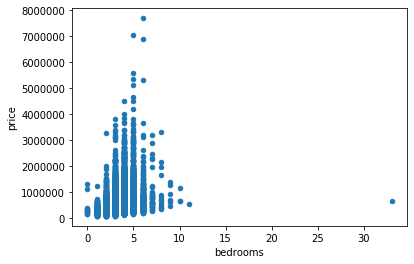

In [29]:
dataset.plot.scatter(x='bedrooms',y='price')

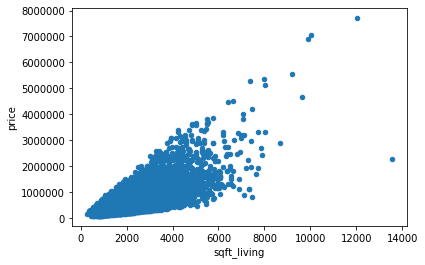

In [30]:
dataset.plot.scatter(x='sqft_living',y='price')

In [31]:
x=dataset.iloc[:,1:].values # explainatory variable being all exclude price
y=dataset.iloc[:,0].values # explainatory variable being price

In [32]:
len(x)

21613

In [33]:
len(y)

21613

In [34]:
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3 ,shuffle=False,random_state =1)
# 33% of data is used for testing and remaining for training

In [38]:
len(x_train)

14408

In [39]:
len(x_test)

7205

In [40]:
len(x)

21613

In [41]:
21613 == 14408+7205

True

In [42]:
# dataset is fine

In [43]:
import statsmodels.api as sm

In [44]:
model=sm.OLS(y_train,x_train).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              7303.
Date:                Fri, 24 Jul 2020   Prob (F-statistic):                        0.00
Time:                        13:37:01   Log-Likelihood:                     -1.9816e+05
No. Observations:               14408   AIC:                                  3.963e+05
Df Residuals:                   14394   BIC:                                  3.964e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.316e+04   2672.603    -12.408      0.000   -3.84e+04   -2.79e+04
x2         -1.667e+04   4243.769     -3.928      0.000    -2.5e+04   -8349.556
x3           128.4040      3.093     41.520      0.000     122.342     134.466
x4             0.0629      0.063      0.991      0.322      -0.061       0.187
x5            93.3229   5142.281      0.018      0.986   -9986.210    1.02e+04
x6          6.471e+05   2.43e+04     26.642      0.000    5.99e+05    6.95e+05
x7          4.922e+04   2873.767     17.128      0.000    4.36e+04    5.49e+04
x8          5.871e+04   2897.779     20.262      0.000     5.3e+04    6.44e+04
x9           1.04e+05   2946.189     35.293      0.000    9.82e+04     1.1e+05
x10           54.1552      3.162     17.129      0.000      47.958      60.352
x11           74.2488      3.541     20.970      0.000      67.309      81.189
x12         -388.1711     10.788    -35.983      0.000    -409.316    -367.026
x13           72.9650      4.652     15.685      0.000      63.846      82.084
x14           28.4886      4.780      5.960      0.000      19.120      37.857
x15           -0.8346      0.099     -8.439      0.000      -1.028      -0.641
==============================================================================
Omnibus:                    11708.547   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1083113.154
Skew:                           3.326   Prob(JB):                         0.00
Kurtosis:                      44.952   Cond. No.                     2.12e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.93e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
prediction =model.predict(x_test)

In [47]:
#actual value
y_test[1255]

185000.0

In [48]:
prediction[1255]

131609.91808859952

In [49]:
round(prediction[1255],0)

131610.0

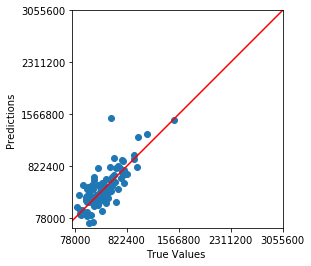

In [54]:
plt.scatter(y_test[0:100], prediction[0:100])
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.yticks(np.arange(min(y_test), max(y_test), step=(max(y_test) - min(y_test))/5))

plt.xticks(np.arange(min(y_test), max(y_test), step=(max(y_test) - min(y_test))/5))
#plt.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
x = np.linspace(0,5000000,1000000)
plt.plot(x, x, '-r', label='y=x')



In [56]:
print(y_test[1235])
prediction[1235]

455000.0


332133.76553017995

In [ ]:
print(y_test[1235])
prediction[1235]